### importing appropriate libraries

In [1]:
import pandas as pd
import seaborn as sns

### loading the dataset

In [2]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### checking the summary 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### checking for null values

In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

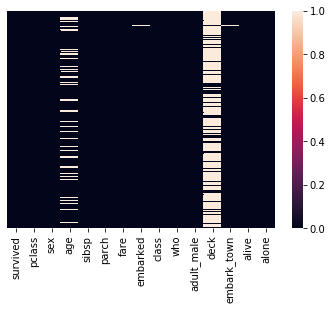

In [6]:
sns.heatmap(df.isnull(), yticklabels=False)

### removing irrelevant and null columns

In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
df.drop(columns=['embark_town', 'embarked', 'alive', 'class', 'who','deck'], inplace=True)

In [9]:
df  #parch is number of parents/children onboard while sibsp means number of siblings/spouses

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,True,False
1,1,1,female,38.0,1,0,71.2833,False,False
2,1,3,female,26.0,0,0,7.9250,False,True
3,1,1,female,35.0,1,0,53.1000,False,False
4,0,3,male,35.0,0,0,8.0500,True,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,True,True
887,1,1,female,19.0,0,0,30.0000,False,True
888,0,3,female,NaN,1,2,23.4500,False,False
889,1,1,male,26.0,0,0,30.0000,True,True


In [10]:
df.isna().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
adult_male      0
alone           0
dtype: int64

In [14]:
df.dropna(inplace=True)

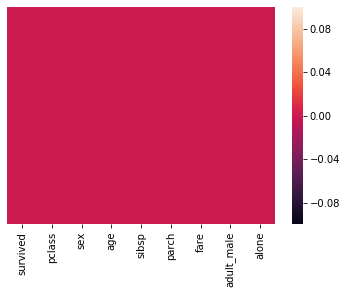

In [15]:
sns.heatmap(df.isnull(), yticklabels=False)

### preparing the data for modeling

In [19]:
pd.get_dummies(df.sex, drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
df['sex']=pd.get_dummies(df.sex, drop_first=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,True,False
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,False
4,0,3,1,35.0,0,0,8.0500,True,True
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,False,False
886,0,2,1,27.0,0,0,13.0000,True,True
887,1,1,0,19.0,0,0,30.0000,False,True
889,1,1,1,26.0,0,0,30.0000,True,True


In [22]:
pd.get_dummies(df.adult_male, drop_first=True).head()

,True
0,1
1,0
2,0
3,0
4,1


In [23]:
df['adult_male']=pd.get_dummies(df.sex, drop_first=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,1,False
1,1,1,0,38.0,1,0,71.2833,0,False
2,1,3,0,26.0,0,0,7.9250,0,True
3,1,1,0,35.0,1,0,53.1000,0,False
4,0,3,1,35.0,0,0,8.0500,1,True
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,0,False
886,0,2,1,27.0,0,0,13.0000,1,True
887,1,1,0,19.0,0,0,30.0000,0,True
889,1,1,1,26.0,0,0,30.0000,1,True


In [24]:
pd.get_dummies(df.alone, drop_first=True).head()

,True
0,0
1,0
2,1
3,0
4,1


In [25]:
df['alone']=pd.get_dummies(df.sex, drop_first=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,1,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,0
4,0,3,1,35.0,0,0,8.0500,1,1
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,0,0
886,0,2,1,27.0,0,0,13.0000,1,1
887,1,1,0,19.0,0,0,30.0000,0,0
889,1,1,1,26.0,0,0,30.0000,1,1


In [27]:
df.to_csv('titanic_cleaned.csv')